### Google Colab Environment

In [2]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from os import path
import sys
path = '/content/drive/MyDrive/ColabNotebooks'
sys.path.insert(0, path)

In [ ]:
%cd /content/drive/MyDrive/ColabNotebooks/

### Local environment

In [24]:
import importlib
import sys
import numpy as np
from numpy.random import default_rng
rng = default_rng(42)
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from utils_plot import *
from utils_lsm import *

In [8]:
importlib.reload(sys.modules['utils_lsm'])
importlib.reload(sys.modules['utils_plot'])

<module 'utils_plot' from '/Users/zilinchen/Desktop/Fall 2023/courses/project1_514/utils_plot.py'>

Test Basis Function

In [3]:
X = np.array([10, 20, 28])
k = 6
# X.shape
BasisFunct(X, k, 'Laguerre')

array([[ 1.00000000e+00, -9.00000000e+00,  3.10000000e+01,
        -4.56666667e+01,  1.10000000e+01,  3.43333333e+01,
        -3.44444444e+00],
       [ 1.00000000e+00, -1.90000000e+01,  1.61000000e+02,
        -7.92333333e+02,  2.45433333e+03, -4.76566667e+03,
         5.10322222e+03],
       [ 1.00000000e+00, -2.70000000e+01,  3.37000000e+02,
        -2.56566667e+03,  1.32170000e+04, -4.81720667e+04,
         1.25473356e+05]])

In [4]:
X = np.array([10, 20, 28])
k = 6
# X.shape
BasisFunct(X, k, 'Hermite')

array([[          1,          20,         398,        7880,      155212,
            3041200,    59271880],
       [          1,          40,        1598,       63760,     2540812,
          101122400,  4019487880],
       [          1,          56,        3134,      175280,     9796876,
          547222816, 30546508936]])

### American Put Option

Set up American Option Parameters according to the paper

In [26]:
T = 1
r = 0.03
sigma = 0.15
K = 100
S0 = 90
N = 200
M = 100
k = 3

In [27]:
opt_price_put, exe_bound_put, hist_prices_put = LSM_put(T, r, sigma, K, S0, N, M, k, polyn='Laguerre')
opt_price_put

11.818330492939221

In [22]:
opt_price_put, exe_bound_put, hist_prices_put = LSM_put(T, r, sigma, K, S0, N, M, k, polyn='Hermite', reg=0.5)
opt_price_put

/Users/zilinchen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.31519e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/zilinchen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.60136e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/zilinchen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.2635e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/zilinchen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=5.1499e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/zilinchen/anaconda3

9.985453849235775

Plot exercise boundary

In [37]:
t = exe_bound_put.keys()
t

dict_keys([0.995, 0.99, 0.985, 0.98, 0.975, 0.97, 0.965, 0.96, 0.9550000000000001, 0.9500000000000001, 0.9450000000000001, 0.9400000000000001, 0.935, 0.93, 0.925, 0.92, 0.915, 0.91, 0.905, 0.9, 0.895, 0.89, 0.885, 0.88, 0.875, 0.87, 0.865, 0.86, 0.855, 0.85, 0.845, 0.84, 0.835, 0.8300000000000001, 0.8250000000000001, 0.8200000000000001, 0.8150000000000001, 0.81, 0.805, 0.8, 0.795, 0.79, 0.785, 0.78, 0.775, 0.77, 0.765, 0.76, 0.755, 0.75, 0.745, 0.74, 0.735, 0.73, 0.725, 0.72, 0.715, 0.71, 0.705, 0.7000000000000001, 0.6950000000000001, 0.6900000000000001, 0.685, 0.68, 0.675, 0.67, 0.665, 0.66, 0.655, 0.65, 0.645, 0.64, 0.635, 0.63, 0.625, 0.62, 0.615, 0.61, 0.605, 0.6, 0.595, 0.59, 0.585, 0.58, 0.5750000000000001, 0.5700000000000001, 0.5650000000000001, 0.56, 0.555, 0.55, 0.545, 0.54, 0.535, 0.53, 0.525, 0.52, 0.515, 0.51, 0.505, 0.5, 0.495, 0.49, 0.485, 0.48, 0.47500000000000003, 0.47000000000000003, 0.465, 0.46, 0.455, 0.45, 0.445, 0.44, 0.435, 0.43, 0.425, 0.42, 0.41500000000000004, 

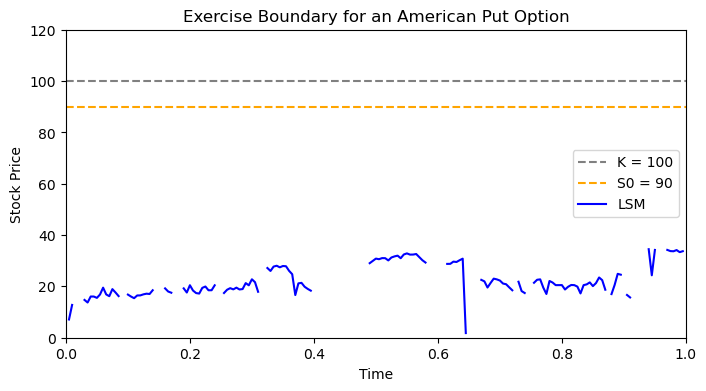

In [35]:
plotExerciseBoundary(T, K, S0, exe_bound_put, ptype= 'max')

### American Call Option

In [42]:
T = 1
r = 0.03
sigma = 0.15
K = 100
S0 = 110
N = 200
M = 1000
k = 3

In [51]:
opt_price_call, exe_bound_call, hist_prices_call = LSM_call(T, r, sigma, K, S0, N, M, k)
opt_price_call

14.958864067618087

In [47]:
opt_price_call, exe_bound_call, hist_prices_call = LSM_call(T, r, sigma, K, S0, N, M, k, polyn='Hermite', reg=0.6)
opt_price_call

/Users/zilinchen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.90807e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/zilinchen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.80016e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/zilinchen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.84042e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/zilinchen/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.93066e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/zilinchen/anacond

10.080126486016514

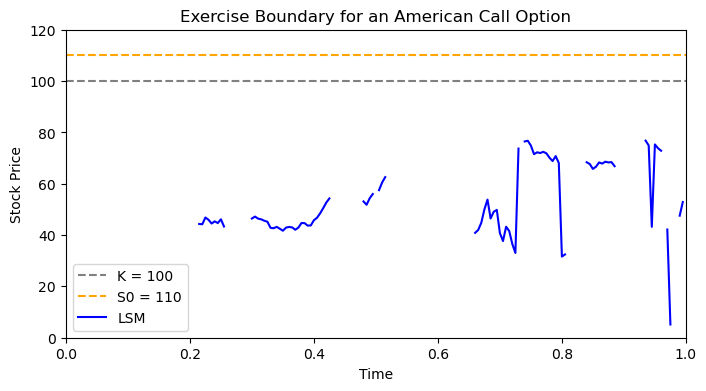

In [52]:
plotExerciseBoundary(T, K, S0, exe_bound_call, ptype='max', opt_type='Call')